In [15]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

students = pd.read_sql_query("select * from studentsperformance", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [49]:
target_cols = students[["gender", "race/ethnicity", "parental level of education"]]
for col in target_cols:
    print("For column {}, the unique values are:".format(col))
    print(target_cols[col].value_counts())

    # such tidy data

For column gender, the unique values are:
female    518
male      482
Name: gender, dtype: int64
For column race/ethnicity, the unique values are:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
For column parental level of education, the unique values are:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

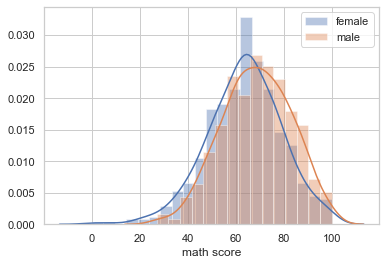

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# gender x math score
# students.groupby(by="gender")["math score"].hist()
# plt.legend()
# plt.show()

sns.distplot(students[students["gender"] == "female"]["math score"], label="female")
plt.legend()

sns.distplot(students[students["gender"] == "male"]["math score"], label="male")
plt.legend()

In [42]:
students[["gender", "race/ethnicity", "parental level of education"]]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college
...,...,...,...
995,female,group E,master's degree
996,male,group C,high school
997,female,group C,high school
998,female,group D,some college


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
target_cols = students[["gender", "race/ethnicity", "parental level of education"]]
for col in target_cols:
    print("For column {}, the unique values are:".format(col))
    print(target_cols[col].value_counts())
    
    #such tidy data

For column gender, the unique values are:
female    518
male      482
Name: gender, dtype: int64
For column race/ethnicity, the unique values are:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
For column parental level of education, the unique values are:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
for col in target_cols:
    print(col)

gender
race/ethnicity
parental level of education


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: unsupported operand type(s) for /: 'str' and 'int'

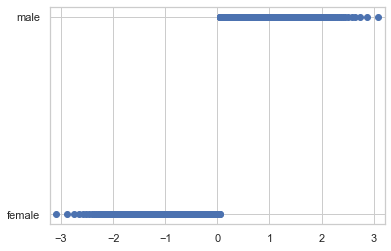

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
for col in students[["gender", "race/ethnicity", "parental level of education"]]:
    qqplot(students[col], line="s")
    # plt.title(genre.Genre.)
    plt.show()
    print(stats.shapiro(students[col]))